In [7]:
pip install --upgrade pandas numpy openpyxl

Requirement already up-to-date: pandas in c:\users\acer\anaconda3\lib\site-packages (2.0.3)
Requirement already up-to-date: numpy in c:\users\acer\anaconda3\lib\site-packages (1.24.4)
Note: you may need to restart the kernel to use updated packages.
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.4
    Uninstalling openpyxl-3.0.4:
      Successfully uninstalled openpyxl-3.0.4


In [8]:
import pandas as pd
import numpy as np
import openpyxl

print(pd.__version__)
print(np.__version__)
print(openpyxl.__version__)


2.0.3
1.24.4
3.1.2


In [9]:
# import dataset
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [10]:
data = pd.ExcelFile("kpmg_1.xlsx")

In [11]:
newcust = pd.read_excel(data, 'NewCustomerList')

In [12]:
newcust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.10,1.3750,1.71875,1.460938,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.70,0.7000,0.87500,0.743750,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.01000,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.43,0.5375,0.53750,0.537500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,1.07,1.0700,1.33750,1.337500,4,4,1.703125


**Overview Dataset**

In [13]:
# view the dataset summary.
newcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

**Observation**
Based on the summary findings, it is evident that the dataset contains both missing values and columns that are either unfamiliar or not pertinent to the analysis. Addressing these issues is crucial to ensure the accuracy and relevance of the dataset for further analysis or modeling

In [16]:
# Checking unique value from each columns
for col in newcust.columns:
    print("{} have {} unique values: {}".format(col, newcust[col].nunique(), newcust[col].dtypes))
    if newcust[col].dtypes == 'int64' or newcust[col].dtypes == 'float' or newcust[col].dtypes == 'object':
        print("{} values: {}".format(col, newcust[col].unique()))
        print('')

first_name have 940 unique values: object
first_name values: ['Chickie' 'Morly' 'Ardelis' 'Lucine' 'Melinda' 'Druci' 'Rutledge'
 'Nancie' 'Duff' 'Barthel' 'Rockwell' 'Wheeler' 'Olag' 'Melba' 'Mandie'
 'Dukie' 'Marcelia' 'Winnifred' 'Odilia' 'Karly' 'Teddie' 'Gaston' 'Otis'
 'Tabbatha' 'Brena' 'Rourke' 'Dyane' 'Claudine' 'Blinnie' 'Rhona'
 'Sharron' 'Brien' 'Sybilla' 'Mikel' 'Maisie' 'Arleen' 'Farlie' 'Mitchell'
 'Garik' 'Antonin' 'Vinny' 'Colene' 'Neile' 'Corinna' 'Brooke' 'Gipsy'
 'Sheena' 'Jobina' 'Gale' 'Thaxter' 'Heinrick' 'Taylor' 'Griswold'
 'Odessa' 'Lavena' 'Martelle' 'Briant' 'Marylou' 'Whittaker' 'Normy'
 'Lorrie' 'Jedediah' 'Kaine' 'Loise' 'Cristen' 'Dorothy' 'Rosmunda'
 'Rozamond' 'Gunner' 'Vivienne' 'Sherilyn' 'Bessie' 'Kevina' 'Yancy'
 'Mabelle' 'Hasheem' 'Tobias' 'Glennis' 'Chanda' 'Katheryn' 'Sumner'
 'Valerie' 'Esther' 'Gardie' 'Sean' 'Pietra' 'Marysa' 'Kahaleel' 'Ossie'
 'Sid' 'Ludovico' 'Patricia' 'Andromache' 'Levy' 'Nobe' 'Jehu' 'Symon'
 'Karlik' 'Bengt' 'Evangelin

**Observation:**
After reviewing the summary data, our data-cleaning approach will consist of the following steps:
1. Removing columns with irrelevant values, namely Unnamed: 16, Unnamed: 17, Unnamed: 18, Unnamed: 19, and Unnamed: 20.
2. Populating the last_name column with the corresponding first_name value.
3. Deleting any remaining records that have missing values.
4. Finally, transforming the DOB column into an age_class column.

By implementing these data-cleaning strategies, we aim to improve the quality and relevance of the dataset, ensuring it is more suitable for further analysis or modeling.

# 1. Data Cleaning

In [19]:
copy_newcust = newcust.copy()

In [20]:
copy_newcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

### A. Dropping other colums

In [21]:
copy_newcust.drop(columns = ['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], inplace=True)

In [22]:
copy_newcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

### B.Filling Colum last Name

In [23]:
# filling nan in last name with first name
copy_newcust['last_name'].fillna(copy_newcust['first_name'], inplace=True)

In [24]:
copy_newcust[['first_name', 'last_name']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   first_name  1000 non-null   object
 1   last_name   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [25]:
# checking missing values
copy_newcust.isna().sum()

first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

### C. Deleve Missing Value

In [26]:
copy_newcust.dropna(inplace=True)

In [27]:
copy_newcust.isna().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

In [28]:
copy_newcust.dropna(inplace=True)

In [30]:
copy_newcust.isna().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

### D. Converting DOB To Age Class

In [31]:
# corvert to datetime
copy_newcust['DOB'] = copy_newcust['DOB'].astype('datetime64[ns]')

In [32]:
# create function tu calculate age
from datetime import date
def calculate_age(birthdate):
    today = date.today()
    age = today.year-birthdate.year-((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

# fit into dataframe
copy_newcust['age']=copy_newcust['DOB'].apply(calculate_age)
copy_newcust['age_class'] = (round(copy_newcust['age']/ 10) * 10).astype(int)
copy_newcust.drop(columns=['age'], inplace=True)

In [33]:
copy_newcust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age_class
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,70
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,50
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,40
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,60


In [34]:
copy_newcust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           735 non-null    object        
 1   last_name                            735 non-null    object        
 2   gender                               735 non-null    object        
 3   past_3_years_bike_related_purchases  735 non-null    int64         
 4   DOB                                  735 non-null    datetime64[ns]
 5   job_title                            735 non-null    object        
 6   job_industry_category                735 non-null    object        
 7   wealth_segment                       735 non-null    object        
 8   deceased_indicator                   735 non-null    object        
 9   owns_car                             735 non-null    object        
 10  tenure             

## 2. Filtering Dataset

In the previous analysis, we identified specific criteria for identifying valuable customers with the potential to generate profits for the company. We will now filter the dataset based on the following conditions:

1. Customers aged between 40 and 50 years old (age_class 40 - 50).
2. Customers employed in the manufacture, financial services, or health industries.
3. Customers classified as "mass customers."
4. Customers residing in New South Wales.
5. Customers with property valuation in the 7-10 range.

By applying these filters, we aim to narrow down the dataset to a subset of customers who meet these criteria, which will be valuable for further analysis and targeted business strategies.

In [35]:
newcst = copy_newcust.copy()

In [36]:
# filtering
newcst = newcst.query('age_class in (40, 50) or job_industry_category in ("Manufacturing", "Financial Services", "Health") or wealth_segment == "Mass Customers" and state == "NSW" or (property_valuation >=7 and property_valuation <= 10)')

In [37]:
newcst.reset_index(inplace=True)

In [39]:
newcst= newcst.sort_values(by='Rank')

In [40]:
newcst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 0 to 667
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   index                                668 non-null    int64         
 1   first_name                           668 non-null    object        
 2   last_name                            668 non-null    object        
 3   gender                               668 non-null    object        
 4   past_3_years_bike_related_purchases  668 non-null    int64         
 5   DOB                                  668 non-null    datetime64[ns]
 6   job_title                            668 non-null    object        
 7   job_industry_category                668 non-null    object        
 8   wealth_segment                       668 non-null    object        
 9   deceased_indicator                   668 non-null    object        
 10  owns_car           

In [43]:
# saving dataset
newcst.to_csv('newcst_targeted.csv', index=False)

## 3. EDA of Newcustomer 

**Age Distribution**

   age_class  count
0         20     45
1         30     94
2         40    114
3         50    147
4         60    122
5         70     84
6         80     62


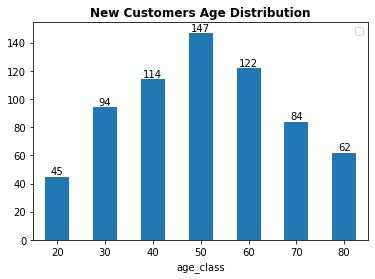

In [47]:
import pandas as pd

# Calculate data
group = newcst.groupby(['age_class'])['age_class'].count()
group = group.reset_index(name='count')

# Create visualization (bar plot)
x = group.plot(kind='bar', x='age_class', y='count')
plt.title('New Customers Age Distribution', fontweight='bold')
plt.xticks(rotation=360)
plt.legend('')

# Show labels on bars
for bar in x.patches:
    x.annotate(format(bar.get_height(), '.0f'),
               (bar.get_x() + bar.get_width() / 2, bar.get_height()),
               ha='center', va='center',
               size=10, xytext=(0, 5),
               textcoords='offset points')

# Convert the data to a table (DataFrame)
age_distribution_table = pd.DataFrame(group)

# Show the table
print(age_distribution_table)


         job_industry  count
0  Telecommunications     17
1         Argiculture     18
2                  IT     19
3       Entertainment     23
4            Property     40
5              Retail     51
6              Health    138
7       Manufacturing    175
8  Financial Services    187


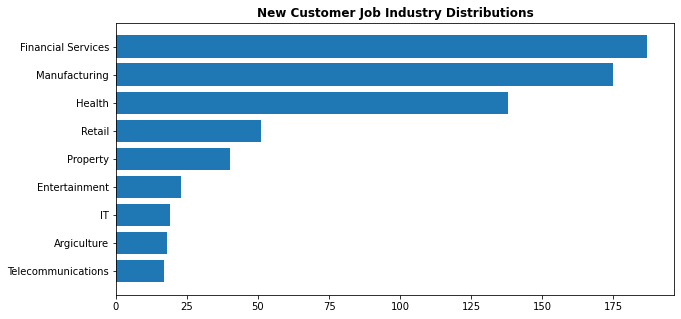

In [49]:
# Calculate data
indust = newcst['job_industry_category'].value_counts().reset_index()
indust.columns = ['job_industry', 'count']

# Visualize job industry
fig, ax = plt.subplots(figsize=(10, 5))

indust_sort = indust.sort_values(by=['count']).reset_index(drop=True)
bars = plt.barh(y=indust_sort['job_industry'], width=indust_sort['count'])

plt.title('New Customer Job Industry Distributions', fontweight='bold')

# Convert the data to a table (DataFrame)
job_industry_table = pd.DataFrame(indust_sort)

# Show the table
print(job_industry_table)


**Wealth Segment Distribution**

      wealth_segment  count
0  Affluent Customer    169
1     High Net Worth    166
2      Mass Customer    333


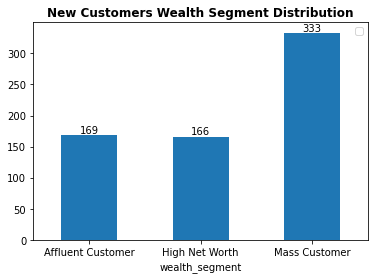

In [50]:
import pandas as pd

# Calculate data
group = newcst.groupby(['wealth_segment'])['wealth_segment'].count()
group = group.reset_index(name='count')

# Create visualization (bar plot)
x = group.plot(kind='bar', x='wealth_segment', y='count')
plt.title('New Customers Wealth Segment Distribution', fontweight='bold')
plt.xticks(rotation=360)
plt.legend('')

# Show labels on bars
for bar in x.patches:
    x.annotate(format(bar.get_height(), '.0f'),
               (bar.get_x() + bar.get_width() / 2, bar.get_height()),
               ha='center', va='center',
               size=10, xytext=(0, 5),
               textcoords='offset points')

# Convert the data to a table (DataFrame)
wealth_segment_table = pd.DataFrame(group)

# Show the table
print(wealth_segment_table)


**State Distribution**

      wealth_segment  count
0  Affluent Customer    169
1     High Net Worth    166
2      Mass Customer    333


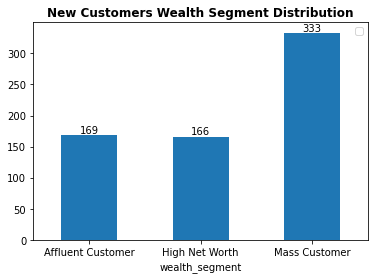

In [51]:
import pandas as pd

# Calculate data
group = newcst.groupby(['wealth_segment'])['wealth_segment'].count()
group = group.reset_index(name='count')

# Create visualization (bar plot)
x = group.plot(kind='bar', x='wealth_segment', y='count')
plt.title('New Customers Wealth Segment Distribution', fontweight='bold')
plt.xticks(rotation=360)
plt.legend('')

# Show labels on bars
for bar in x.patches:
    x.annotate(format(bar.get_height(), '.0f'),
               (bar.get_x() + bar.get_width() / 2, bar.get_height()),
               ha='center', va='center',
               size=10, xytext=(0, 5),
               textcoords='offset points')

# Convert the data to a table (DataFrame)
wealth_segment_table = pd.DataFrame(group)

# Show the table
print(wealth_segment_table)


  state  count
0   NSW    339
1   QLD    143
2   VIC    186


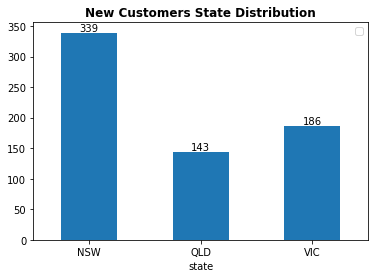

In [52]:
import pandas as pd

# Calculate data
group = newcst.groupby(['state'])['state'].count()
group = group.reset_index(name='count')

# Create visualization (bar plot)
x = group.plot(kind='bar', x='state', y='count')
plt.title('New Customers State Distribution', fontweight='bold')
plt.xticks(rotation=360)
plt.legend('')

# Show labels on bars
for bar in x.patches:
    x.annotate(format(bar.get_height(), '.0f'),
               (bar.get_x() + bar.get_width() / 2, bar.get_height()),
               ha='center', va='center',
               size=10, xytext=(0, 5),
               textcoords='offset points')

# Convert the data to a table (DataFrame)
state_distribution_table = pd.DataFrame(group)

# Show the table
print(state_distribution_table)


    property_valuation  count
0                    1     18
1                    2     28
2                    3     31
3                    4     28
4                    5     34
5                    6     41
6                    7     98
7                    8    106
8                    9    126
9                   10     95
10                  11     35
11                  12     28


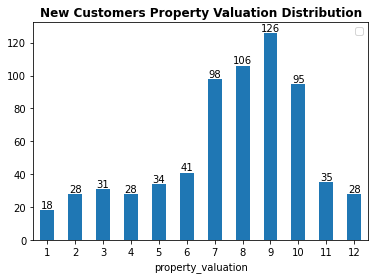

In [53]:
import pandas as pd

# Calculate data
group = newcst.groupby(['property_valuation'])['property_valuation'].count()
group = group.reset_index(name='count')

# Create visualization (bar plot)
x = group.plot(kind='bar', x='property_valuation', y='count')
plt.title('New Customers Property Valuation Distribution', fontweight='bold')
plt.xticks(rotation=360)
plt.legend('')

# Show labels on bars
for bar in x.patches:
    x.annotate(format(bar.get_height(), '.0f'),
               (bar.get_x() + bar.get_width() / 2, bar.get_height()),
               ha='center', va='center',
               size=10, xytext=(0, 5),
               textcoords='offset points')

# Convert the data to a table (DataFrame)
property_valuation_table = pd.DataFrame(group)

# Show the table
print(property_valuation_table)
